In [2]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time, warnings
import datetime as dt

# Data Understanding

Okay, in this time we will built product reccomendation using Colaborative Filtering. First I will tell the data.
here I have some data that I found from kaggle.com and here the resources : https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset. But I've cleaning the data before in customer Segmentation. And now the data has add any features.
the data has Atribute InvoceeNo, StockCode, Description, Quantity, UnitPrice, CustomerID, and Country.
Data Dictionary : <br>
- InvoiceNo : number code of the transacation
- StockCode : the code of item
- Description : dthe description of item
- Quantity : count of item buying.
- InvoiceDate : date of customers transcation full with the time.
- UnitPrice : the price per item.
- CustomerID : ID of customers
- Country : country of customers live.
- TotalTrx : total transcation (quantity x UnitPricce)
- invDate : date without time
- year : year of transaction
- month : month of transaction
- day : day of transaction
- cluster : cluster of customerID
- class : class of customerID (cluster description)

In [3]:
#load dataset
df = pd.read_csv('cleaned_df.csv')
rfmdf = pd.read_csv('cust_seg.csv')

In [4]:
df.head(2)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,cluster,class
0,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,2011,1,4,10,1,Low Spending Old customers
1,42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,2011,1,4,10,1,Low Spending Old customers


In [5]:
#data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371727 entries, 0 to 371726
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   371727 non-null  int64  
 1   InvoiceNo    371727 non-null  int64  
 2   StockCode    371727 non-null  object 
 3   Description  371727 non-null  object 
 4   Quantity     371727 non-null  int64  
 5   InvoiceDate  371727 non-null  object 
 6   UnitPrice    371727 non-null  float64
 7   CustomerID   371727 non-null  float64
 8   Country      371727 non-null  object 
 9   TotalTrx     371727 non-null  float64
 10  invDate      371727 non-null  object 
 11  year         371727 non-null  int64  
 12  month        371727 non-null  int64  
 13  day          371727 non-null  int64  
 14  hour         371727 non-null  int64  
 15  cluster      371727 non-null  int64  
 16  class        371727 non-null  object 
dtypes: float64(3), int64(8), object(6)
memory usage: 48.2+ MB


In [6]:
rfmdf.head()

,Unnamed: 0,CustomerID,recency,frequency,monetary,cluster,class
0,0,12346.0,325,0.301030,4.887531,2,Low Spending Old customers
1,1,12347.0,2,2.181844,3.556207,0,Best customers
2,2,12348.0,75,1.176091,2.956860,1,Middle Spending Active customers
3,3,12349.0,18,1.869232,3.245155,1,Middle Spending Active customers
4,4,12350.0,310,1.255273,2.525563,2,Low Spending Old customers


In [7]:
#total rows and columns
df.shape


(371727, 17)

In [8]:
#check unique value for each columns
df.nunique()

Unnamed: 0     371727
InvoiceNo       17132
StockCode        3596
Description      3520
Quantity          294
InvoiceDate     15989
UnitPrice         428
CustomerID       4219
Country            36
TotalTrx         2735
invDate           285
year                1
month              12
day                31
hour               15
cluster             4
class               4
dtype: int64

In [9]:
#check value counts in country columns
df['Country'].value_counts()

United Kingdom          330379
Germany                   8528
France                    7907
EIRE                      6903
Spain                     2409
Netherlands               2287
Belgium                   1936
Switzerland               1792
Portugal                  1346
Australia                 1150
Norway                     924
Channel Islands            731
Italy                      718
Finland                    668
Cyprus                     531
Sweden                     425
Austria                    390
Denmark                    360
Poland                     322
Japan                      256
Israel                     248
Unspecified                244
Singapore                  222
USA                        179
Iceland                    151
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Brazil  

In [10]:
#check total of missing value
df.isna().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalTrx       0
invDate        0
year           0
month          0
day            0
hour           0
cluster        0
class          0
dtype: int64

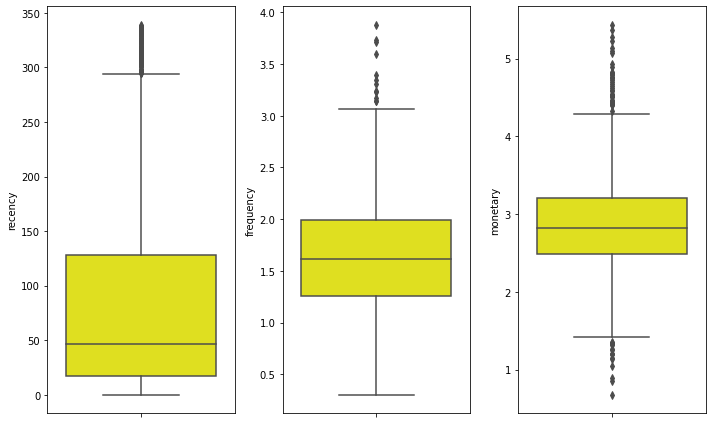

In [11]:
#define variable of column to figure out visualization
val = ['recency','frequency','monetary']
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
# plotting
for i in range(0, len(val)):
    plt.subplot(1, len(val), i+1)
    sns.boxplot(y=rfmdf[val[i]], color='yellow')
    plt.tight_layout()


the data has outlers, but we'll keep it, because that's data transaction.

In [12]:
# # def check_outlier(data, column):
# def check_outlier(data, column):
#     q1 = data[column].quantile(0.25)
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
    
#     return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
#                                  else 'not-outlier' for x in data[column].values]


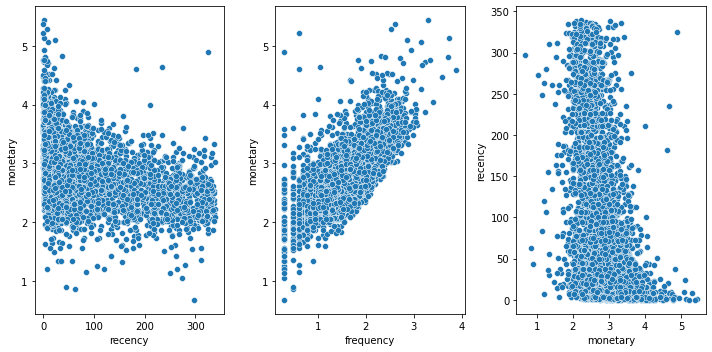

In [13]:
#scatter of data 
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.scatterplot(ax=axes[0],data=rfmdf,x='recency', y='monetary')
sns.scatterplot(ax=axes[1],data=rfmdf,x='frequency', y='monetary')
sns.scatterplot(ax=axes[2],data=rfmdf,y='recency', x='monetary')
plt.tight_layout()

In [14]:

# df['rating'] = [0.5 if (x>0 and x < 3 and y > 0 and y <=1) else
#                 1 if (x>=3 and x<=5 and y > 0 and y <= 1) else
#                 1.5 if (x>5 and  x<=7 and y >0 and y <= 1) else
#                 2 if (x>0 and x < 3 and y > 1 and y <= 3) else
#                 2.5 if (x>0 and x < 3 and y > 3 and y <= 5) else
#                 3 if (x>5 and x<=7 and y > 3 and y <= 5) else
#                 3.5 if (x>0 and x <= 10  and y >0 ) else
#                 4 if (x>10 and x <= 20 and y > 0 and y <= 10) else 
#                 4.5 if (x>10 and x<=20 and y >10 )else
#                 5 if (x>20  and y > 0) else 'none' for x,y in zip(df['Quantity'], df['UnitPrice'])]

In [15]:
# df.rating.value_counts()

In [16]:
# af = np.arange(0.5,5.5,0.5)

# for z in af:
#     dd = df[df['rating']==z]
#     print('Min Transaction in Rating',z,'is',dd.TotalTrx.min())
#     print('Max Transaction in Rating',z,'is',dd.TotalTrx.max(),'\n')

In [17]:
# #grouping StockCode 
# product_code = df.groupby(['StockCode','Description']).agg(number_of_ratings = ('rating', 'sum')).reset_index()
# #sorted by counts 
# product_code = product_code.sort_values(by=['number_of_ratings'],ascending=False)

# product_code.head()

In [18]:
# product_code.sort_values(by='number_of_ratings',ascending=False)

In [52]:
df_baskets = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity']]
df_baskets.head()

,InvoiceNo,StockCode,Description,Quantity
0,539993,22386,JUMBO BAG PINK POLKADOT,10
1,539993,21499,BLUE POLKADOT WRAP,25
2,539993,21498,RED RETROSPOT WRAP,25
3,539993,22379,RECYCLING BAG RETROSPOT,5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10


In [20]:
df.groupby('Description').agg(
    orders=('InvoiceNo', 'nunique'),
    quantity=('Quantity', 'sum')
).sort_values(by='orders', ascending=False).head(10)

,orders,quantity
Description,,
MAILOUT,1945,43236
WHITE HANGING HEART T-LIGHT HOLDER,1777,33171
REGENCY CAKESTAND 3 TIER,1566,10832
JUMBO BAG RED RETROSPOT,1517,44125
PARTY BUNTING,1356,15101
ASSORTED COLOUR BIRD ORNAMENT,1284,33095
LUNCH BAG RED RETROSPOT,1235,17249
SET OF 3 CAKE TINS PANTRY DESIGN,1099,6808
POSTAGE,1035,2900


In [53]:
df_items = df_baskets.pivot_table(index='InvoiceNo', columns=['Description'], values='Quantity').fillna(0)
df_items.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def get_recommendations(df, item):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        df (dataframe): Pandas dataframe containing matrix of items purchased.
        item (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = df.corrwith(df[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    recommendations = recommendations.iloc[1:]
    
    return recommendations

In [71]:
recommendations = get_recommendations(df_items, 'CERAMIC CAKE DESIGN SPOTTED MUG')
recommendations.head()

,Description,correlation
601,CERAMIC CAKE DESIGN SPOTTED PLATE,0.342997
3073,STRAWBERRY FAIRY CAKE TEAPOT,0.335386
609,CERAMIC STRAWBERRY DESIGN MUG,0.323295
599,CERAMIC CAKE BOWL + HANGING CAKES,0.241313
3133,TEA TIME TEA SET IN GIFT BOX,0.221122


In [73]:
recommendations = df_items.corrwith(df_items['CERAMIC CAKE DESIGN SPOTTED MUG'])
recommendations.dropna(inplace=True)
recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
recommendations

,Description,correlation
0,4 PURPLE FLOCK DINNER CANDLES,-0.001981
1,50'S CHRISTMAS GIFT BAG LARGE,-0.002191
2,DOLLY GIRL BEAKER,-0.001757
3,I LOVE LONDON MINI BACKPACK,-0.002031
4,NINE DRAWER OFFICE TIDY,-0.002187
...,...,...
3515,ZINC T-LIGHT HOLDER STAR LARGE,-0.004492
3516,ZINC T-LIGHT HOLDER STARS SMALL,-0.004255
3517,ZINC WILLIE WINKIE CANDLE STICK,-0.000099
3518,ZINC WIRE KITCHEN ORGANISER,-0.001471


In [74]:
recommendations = recommendations.sort_values(by='correlation', ascending=False)
recommendations

,Description,correlation
600,CERAMIC CAKE DESIGN SPOTTED MUG,1.000000
601,CERAMIC CAKE DESIGN SPOTTED PLATE,0.342997
3073,STRAWBERRY FAIRY CAKE TEAPOT,0.335386
609,CERAMIC STRAWBERRY DESIGN MUG,0.323295
599,CERAMIC CAKE BOWL + HANGING CAKES,0.241313
...,...,...
1778,LUNCH BAG SPACEBOY DESIGN,-0.007337
184,ANTIQUE SILVER TEA GLASS ETCHED,-0.007430
1769,LUNCH BAG BLACK SKULL.,-0.007987
1776,LUNCH BAG RED RETROSPOT,-0.008051


In [75]:
recommendations = recommendations[1:]
recommendations.head()

,Description,correlation
601,CERAMIC CAKE DESIGN SPOTTED PLATE,0.342997
3073,STRAWBERRY FAIRY CAKE TEAPOT,0.335386
609,CERAMIC STRAWBERRY DESIGN MUG,0.323295
599,CERAMIC CAKE BOWL + HANGING CAKES,0.241313
3133,TEA TIME TEA SET IN GIFT BOX,0.221122


In [72]:
df_items.corr()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,-0.001031,-0.000827,-0.000956,-0.001029,-0.000944,-0.000964,-0.001210,-0.001583,-0.000840,...,0.000672,-0.000517,-0.002712,-0.000771,-0.001538,-0.000375,-0.002019,-0.001894,-0.000692,-0.000646
50'S CHRISTMAS GIFT BAG LARGE,-0.001031,1.000000,-0.000419,0.000006,-0.001138,-0.001044,0.901727,-0.001072,0.003707,-0.000928,...,0.007637,-0.002381,0.000720,-0.000852,-0.001701,0.000612,0.002093,-0.002094,-0.000765,-0.000715
DOLLY GIRL BEAKER,-0.000827,-0.000419,1.000000,0.000005,0.004916,-0.000783,-0.000714,0.075817,0.003786,0.004619,...,-0.001204,-0.001466,0.142079,-0.000684,0.000533,-0.000926,-0.001365,0.190108,-0.000614,-0.000573
I LOVE LONDON MINI BACKPACK,-0.000956,0.000006,0.000005,1.000000,0.013945,-0.000968,0.000076,0.008666,-0.001623,0.109942,...,-0.001392,-0.001827,-0.002473,-0.000790,-0.001577,-0.002189,-0.002070,0.183130,-0.000710,-0.000663
NINE DRAWER OFFICE TIDY,-0.001029,-0.001138,0.004916,0.013945,1.000000,-0.001042,-0.001065,-0.000162,-0.001748,0.007261,...,-0.001499,0.001688,-0.000807,-0.000851,-0.001698,-0.002357,-0.002229,-0.002091,-0.000764,-0.000713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STAR LARGE,-0.000375,0.000612,-0.000926,-0.002189,-0.002357,0.001740,-0.002209,-0.001306,0.038434,-0.001923,...,0.096306,-0.000641,0.014315,-0.001016,0.003236,1.000000,0.321099,0.012818,-0.001586,0.000373
ZINC T-LIGHT HOLDER STARS SMALL,-0.002019,0.002093,-0.001365,-0.002070,-0.002229,-0.001271,0.001163,-0.002749,0.020968,-0.001642,...,0.048783,0.003791,0.013093,0.010721,0.047165,0.321099,1.000000,0.000441,0.001022,0.051748
ZINC WILLIE WINKIE CANDLE STICK,-0.001894,-0.002094,0.190108,0.183130,-0.002091,-0.001918,-0.001959,0.039042,-0.003216,0.006376,...,0.005948,-0.001198,0.031932,-0.001566,0.009739,0.012818,0.000441,1.000000,-0.001406,0.004273
